В этом отчёте мы исследуем характер и особенности задержек рейсов

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url1 = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv'
url2 = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv'    

flights = pd.read_csv(url1, sep=',')
weather = pd.read_csv(url2, sep=',')

In [3]:
flights[1:21]

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
5,6,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
6,7,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0
7,8,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0
8,9,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0
9,10,2013,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733,5.0,58.0
10,11,2013,1,1,558.0,-2.0,849.0,-2.0,B6,N793JB,49,JFK,PBI,149.0,1028,5.0,58.0


In [4]:
delaysph = flights.groupby(flights[flights.dep_delay>0].hour).size().reset_index(name = 'Amount_of_delays')
flightsph = flights.groupby('hour').size().reset_index(name = 'Amount_of_flights')
total = pd.merge(delaysph, flightsph, on = 'hour')
amount_of_flights = total['Amount_of_flights'].sum()
amount_of_delays = total['Amount_of_delays'].sum()
total['Percentage'] = (total.Amount_of_delays/total.Amount_of_flights)*100

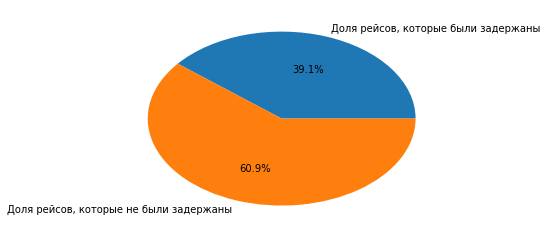

In [5]:
plt.pie([amount_of_delays,amount_of_flights-amount_of_delays], labels=['Доля рейсов, которые были задержаны','Доля рейсов, которые не были задержаны'], autopct = '%1.1f%%')
plt.show()

Как видно из диаграммы, чуть больше трети рейсов ежегодно задерживают свой вылет

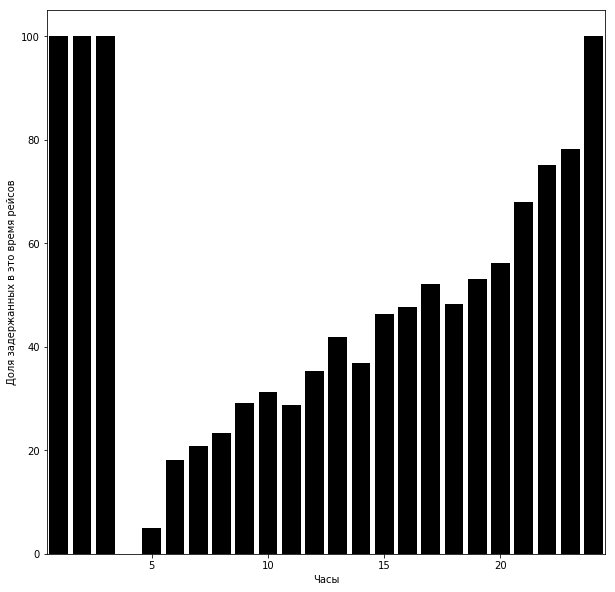

In [6]:
plt.figure(figsize=(10,10))
plt.bar(total.hour, total.Percentage, color='black')
plt.xlabel('Часы')
plt.ylabel('Доля задержанных в это время рейсов')
plt.xlim(0.5,24.5)
plt.show()

Надо освободить вечернее и ночное время

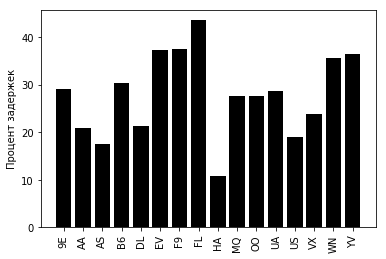

In [7]:
flights1=flights[(flights.dep_delay>0) & (flights.arr_delay>0)]
amountofdelpercar=flights1.groupby('carrier').size().reset_index(name='AmountOfDel')
flights2=flights[np.isfinite(flights['dep_time'])]
amountpercar=flights2.groupby('carrier').size().reset_index(name='Amount')
carmerge=pd.merge(amountofdelpercar, amountpercar, on=['carrier'])
carmerge['Percentage']=(carmerge.AmountOfDel/carmerge.Amount)*100
ind = np.arange(len(carmerge.carrier))
plt.bar(ind, carmerge.Percentage, color='black')
plt.xticks(ind, carmerge.carrier, rotation='vertical')
plt.ylabel('Процент задержек')
plt.show()

Надо провести работу с компании, процент задержек которых более 20-30 процентов

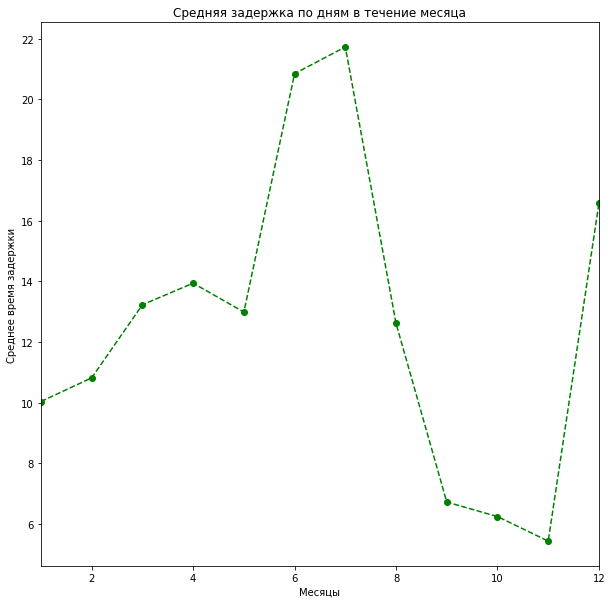

In [8]:
grouped_flights=flights.groupby('month')['dep_delay'].mean().reset_index(name='Daily_mean_delay')
plt.figure(figsize=(10,10))
plt.plot(grouped_flights.month, grouped_flights.Daily_mean_delay, 'go--')
plt.xlim(1,12)
plt.title('Средняя задержка по дням в течение месяца')
plt.xlabel('Месяцы')
plt.ylabel('Среднее время задержки')
plt.show()

Видим, что к середине года у аэропортов начинаются большие нагрузки, а ближе к концу они напротив, значительно проседают. Следовательно, нужно привлекать больше рабочих на обслуживание в середине года

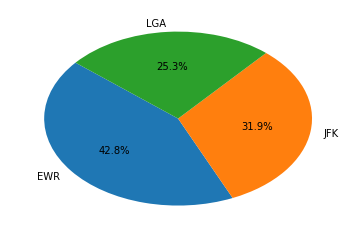

In [9]:
gr_by_or=flights.groupby('origin').sum()['dep_delay'].reset_index(name='Amount')
col=gr_by_or.Amount
plt.pie([col[0],col[1],col[2]], labels=gr_by_or.origin, autopct='%1.1f%%', shadow=False, startangle=140)
plt.show()

Судя по диаграмме, нужно переместить нагрузку с Newark International Airport на LaGuardia Airport

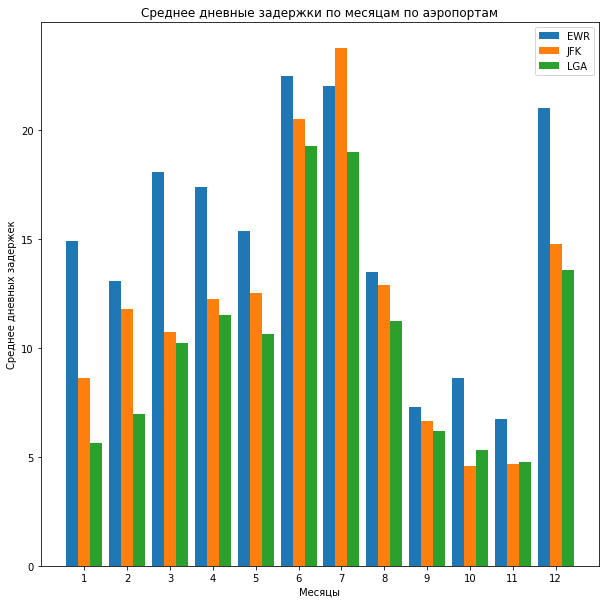

In [20]:
ewr=flights[flights.origin=='EWR']
jfk=flights[flights.origin=='JFK']
lga=flights[flights.origin=='LGA']
ewr_del=ewr.groupby('month')['dep_delay'].mean().reset_index(name='Daily_mean_delay')
jfk_del=jfk.groupby('month')['dep_delay'].mean().reset_index(name='Daily_mean_delay')
lga_del=lga.groupby('month')['dep_delay'].mean().reset_index(name='Daily_mean_delay')
ind=np.arange(12)
width=0.28
plt.figure(figsize=(10,10))
plt.bar(ind, ewr_del.Daily_mean_delay, width, label='EWR')
plt.bar(ind+width, jfk_del.Daily_mean_delay, width, label='JFK')
plt.bar(ind+2*width, lga_del.Daily_mean_delay, width, label='LGA')
plt.xticks(ind+width, ind+1)
plt.ylabel('Среднее дневных задержек')
plt.xlabel('Месяцы')
plt.title('Среднее дневные задержки по месяцам по аэропортам')
plt.legend(loc='best')
plt.show()

Отсюда можно сделать вывод, что Newark International Airport стоит разгрузить с конца года и до середины следующего

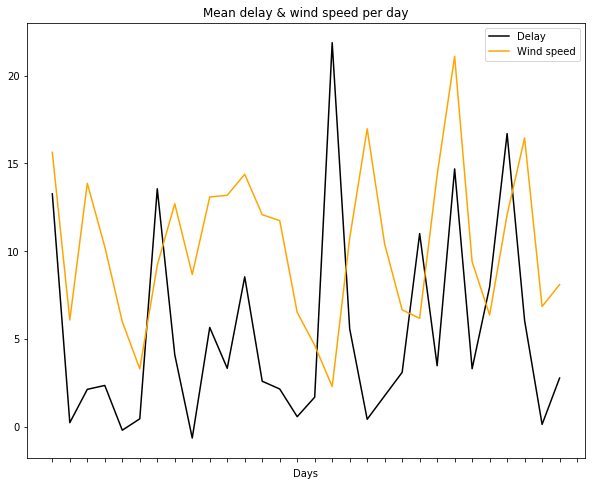

In [27]:
plt.figure(figsize=(10,8))
flights[flights['month']==11].groupby(['month', 'day'])['dep_delay'].mean().plot(color = 'black', label = 'Delay')
weather[weather['month']==11].groupby(['month', 'day'])['wind_speed'].mean().plot(color = 'orange', label = 'Wind speed')
plt.xticks(range(31))
plt.legend()
plt.title('Mean delay & wind speed per day')
plt.xlabel('Days')
plt.show()

По этому графику мы можем увидеть, как зависит скорость ветра в ноябре от задержек. Очевидно, что, чем больше скорость ветра, тем больше и задержка.

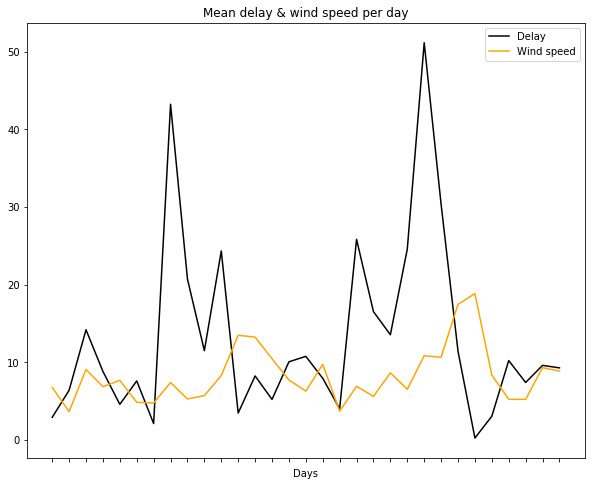

In [30]:
plt.figure(figsize=(10,8))
flights[flights['month']==5].groupby(['month', 'day'])['dep_delay'].mean().plot(color = 'black', label = 'Delay')
weather[weather['month']==5].groupby(['month', 'day'])['wind_speed'].mean().plot(color = 'orange', label = 'Wind speed')
plt.xticks(range(31))
plt.legend()
plt.title('Mean delay & wind speed per day')
plt.xlabel('Days')
plt.show()

А это - зависимость в мае. Таким образом, можно сделать вывод, что в осенне-зимнее время, влияние ветра на задержки гораздо сильнее, чем весной и летом. Поэтому при планировании рейсов стоит учитывать влажность.

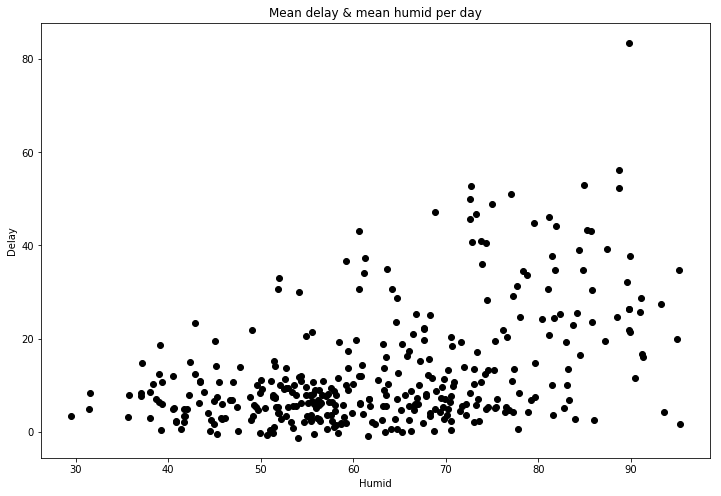

In [34]:
plt.figure(figsize=(12,8))
plt.scatter(weather.groupby(['month','day'])['humid'].mean(), flights.groupby(['month','day'])['dep_delay'].mean()[0:364], color = 'black')
plt.title('Mean delay & mean humid per day')
plt.xlabel('Humid')
plt.ylabel('Delay')
plt.show()

Отсюда можно сделать вывод, что, чем сильнее влажность, тем больше вероятность высокой задержки, поэтому при планировании рейсов стоит учитывать влажность. 

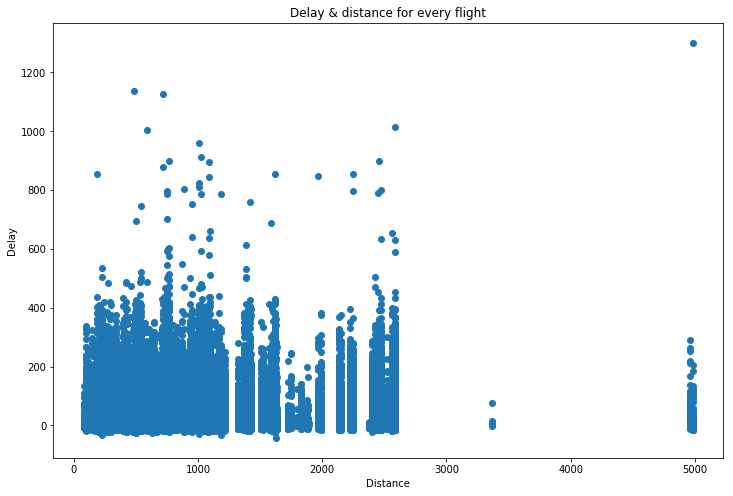

In [36]:
plt.figure(figsize=(12,8))
plt.scatter(flights['distance'], flights['dep_delay'])
plt.title('Delay & distance for every flight')
plt.xlabel('Distance')
plt.ylabel('Delay')
plt.show()

Здесь мы видим, что дистанция полёта никак не зависит от задержки

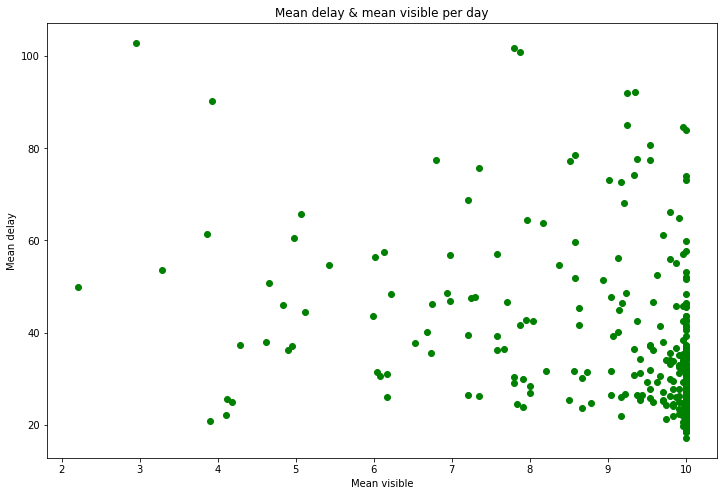

In [39]:
plt.figure(figsize=(12,8))
plt.scatter(weather.groupby(['month','day'])['visib'].mean(), flights[flights.dep_delay > 0].groupby(['month','day'])['dep_delay'].mean()[0:364], color = 'green')
plt.title('Mean delay & mean visible per day')
plt.xlabel('Mean visible')
plt.ylabel('Mean delay')
plt.show()

Из этой диаграммы видно, что при видимости, близкой к 10, больше вероятность меньшей задержки